<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyGameOfLife</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Game</b>Of<b style=color:red;>Life</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyGameOfLife.png"></td>
</tr>
</table>

----
# `pyGameOfLife`

Conway's Game of Life, the famous cellular automaton of [John Horton Conway](https://de.wikipedia.org/wiki/John_Horton_Conway) (1932-2020).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import libGameOfLife

----
## Update grid
We now define the **update rules** for the $N$ by $M$ nodal points:
The cell' state is:
- **living**, if 2 or 3 neighboring cells live
- **dead**, else ...

In [2]:
def gridUpdate(grid):
    # update 2D grid
    N = grid.shape[0]
    M = grid.shape[1]
    # first, make a copy of the old grid
    newgrid = grid.copy()
    # then, apply Conway's rules to each cell
    for i in range(N):
        for j in range(M):
            total = 0
            # top row of neighbors
            total += np.roll(grid,(1,1),(0,1))[i,j]   #grid[i-1,j-1]
            total += np.roll(grid,(1,0),(0,1))[i,j]   #grid[i-1,j]
            total += np.roll(grid,(1,-1),(0,1))[i,j]  #grid[i-1,j+1]
            # middle row of neighbors
            total += np.roll(grid,(0,1),(0,1))[i,j]   #grid[i,j-1]
            total += np.roll(grid,(0,-1),(0,1))[i,j]  #grid[i,j+1]
            # bottom row of neighbors
            total += np.roll(grid,(-1,1),(0,1))[i,j]  #grid[i+1,j-1]
            total += np.roll(grid,(-1,0),(0,1))[i,j]  #grid[i+1,j]
            total += np.roll(grid,(-1,-1),(0,1))[i,j] #grid[i+1,j+1]
            # fate of living cell
            if grid[i,j]  == 1: 
                if (total < 2) or (total > 3): 
                    newgrid[i,j] = 0 
            # fate of dead cell
            else: 
                if total == 3: 
                    newgrid[i,j] = 1
    grid[:] = newgrid[:]
    return grid

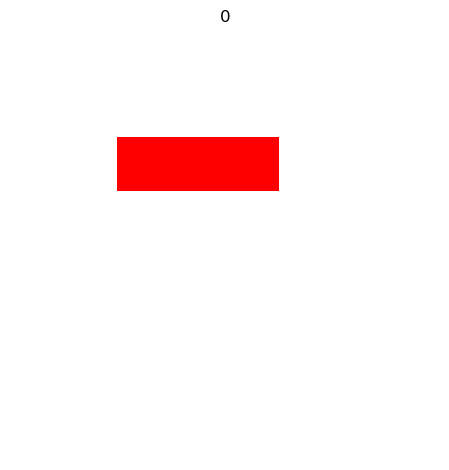

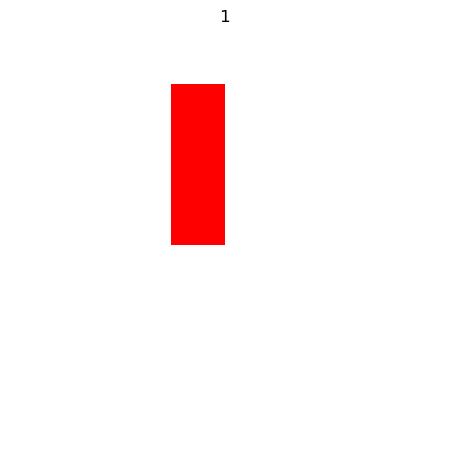

In [9]:
N,M = 8,8
itime=0
grid = libGameOfLife.gridInit(N,M)
grid = libGameOfLife.addBlinker(2,2,grid)
libGameOfLife.gridPlot(grid,itime,plot=True)
grid=gridUpdate(grid)
itime=1
libGameOfLife.gridPlot(grid,itime,plot=True)

----